## 감성 분석

감성 : 어떤 대상에 대한 주관적인 감정으로 보통 긍정, 중립, 부정으로 나누어진다.
중립은 감정 없이 객관적인 정보만을 전달하는 텍스트이다.
극성 : 감성의 정도
보통 극성은 감성 분석의 과정에서 숫자로 표현되며 0이면 중립, 양수이면 긍정, 음수이면 부정을 나타낸다.

#### 감성 분석 방법론
- 어휘 기반 감성 분석
- 기계 학습 기반 감성 분석

### 1. 어휘 기반 감성 분석

감성이 표현될 수 있는 명사, 형용사, 동사를 대상으로 모든 단어에 대해 긍정 혹은 부정의 감성을 붙여서 감성 사전을 구축한 후에, 이를 기반으로 텍스트에 대한 감성 분석을 수행하는 방식이다.

감성 사전으로부터 각 단어들에 대한 감성 값을 가져온 후에 이를 조합해 텍스트에 대한 감성을 계산한다.

청킹(chunking) : 문장의 형태소를 분석하고 다시 이를 명사구, 형용사구와 같은 구로 묶는 방법
청킹을 수행한 후에 밑의 단어로부터 상위의 구로 이동하면서 단계적으로 긍정/부정을 결정한다.

#### 2. 머신러닝 기반 감성 분석

**학습용으로 리뷰와 그 리뷰에 대한 감성이 라벨로 짝지어진 학습 데이터셋이 반드시 있어야한다.**
이는 머신러닝을 통해 긍정/중립/부정으로 분류하는 문서 분류 문제로 본다.

머신러닝 기반의 감성 분석은 학습에 사용한 말뭉치의 영향을 많이 받는다. 그렇기에, 다른 데이터에 전이하여 사용하기에는 무리가 있다.


#### 감성 사전을 이용한 영화 리뷰 감성 분석

In [1]:
## 데이터 준비
import nltk
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ahyeo\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [1]:
from nltk.corpus import movie_reviews

print("#review count : ", len(movie_reviews.fileids())) #영화 리뷰 문서의 id(제목) 반환
print('#samples of file ids:', movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print('#categories of reviews:', movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('#num of "neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('#num of "pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환

fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환
print('#id of the first review:', fileid)
print('#part of the first review:', movie_reviews.raw(fileid)[:500]) #첫번째 문서의 내용을 500자까지만 출력
print('#sentiment of the first review:', movie_reviews.categories(fileid)) #첫번째 문서의 감성

#review count :  2000
#samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
#categories of reviews: ['neg', 'pos']
#num of "neg" reviews: 1000
#num of "pos" reviews: 1000
#id of the first review: neg/cv000_29416.txt
#part of the first review: plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt
#sentiment of the first review: ['neg']


In [2]:
fileids = movie_reviews.fileids() #movie review data에서 file 제목을 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids] #file 제목을 이용해 raw text file을 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids] #감정(극성)을 가져옴

#### TextBlob을 이용한 감성 분석

polarity : 감성을 나타내는 극성
subjectivity : 0.0과 1.0 사이의 실수로, 0에 가까울수록 객관적, 1에 가까울수록 주관적임을 의미한다.

positive와 negative만 존재할 때에는 "중립"은 부정으로 판단한다.

TextBlob 라이브러리는 정확도 함수를 제공하지 않으므로, scikit-learn의 accuracy_score을 불러와 정확도를 확인해야한다.

감성사전을 사용하는 것은 **정확도가 높지 않다.**

In [8]:
from textblob import TextBlob

result = TextBlob(reviews[0]) #극성은 0.06으로 약한 긍정
print(result.sentiment) #주관성은 0.5로 중간

Sentiment(polarity=0.06479782948532947, subjectivity=0.5188408350908352)


In [11]:
def sentimnet_TextBlob(docs):
    results= []

    for doc in docs:
        testimonial = TextBlob(doc)
        if testimonial.sentiment.polarity > 0:
            results.append('pos')
        else:
            results.append('neg')
    return results

In [12]:
from sklearn.metrics import accuracy_score

print(
    "#TextBlob을 이용한 리뷰 감성분석의 정확도: ",
    accuracy_score(categories, sentimnet_TextBlob(reviews))
)

#TextBlob을 이용한 리뷰 감성분석의 정확도:  0.6


#### AFINN을 이용한 감성분석

토큰화와 같은 작업을 알아서 해준다.

score 함수를 가져와 극성을 판단한다.

langauge : 영어 외의 다른 언어를 사용하고 싶은 경우
emoticons : 이모티콘이 존재할 경우 True로 설정한다.

In [13]:
from afinn import Afinn

def dentiment_Affin(docs):
    afn = Afinn(emoticons = True)
    results = []

    for doc in docs:
        if afn.score(doc) > 0:
            results.append('pos')
        else:
            results.append('neg')
    return results

from sklearn.metrics import accuracy_score

print(
    "#Afinn을 이용한 리뷰 감성분석의 정확도: ",
    accuracy_score(categories, dentiment_Affin(reviews))
)

#Afinn을 이용한 리뷰 감성분석의 정확도:  0.664


#### VADER를 이용한 감성 분석

규칙 기반의 감성 분석 알고리즘을 사용하며, 트위터나 페이스북 같은 소셜 미디어의 텍스트에서 좋은 성능이 나올 수 있도록 개발되었다.
NLTK 라이브러리에서 사용 가능하다.

4개의 극성 값을 제공하는데 pos, neg, neu(중립)에 대한 값을 나타낸다.
넷째 극성 값인 compound는 이 세 값을 적절히 조합해 -1과 1 사이의 극성 값을 제공한다.

In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ahyeo\AppData\Roaming\nltk_data...


True

In [17]:
from afinn import Afinn
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(docs):
    analyser= SentimentIntensityAnalyzer()
    results = []

    for doc in docs :
        score = analyser.polarity_scores(doc)
        if score['compound'] > 0:
            results.append('pos')
        else:
            results.append('neg')

    return results

from sklearn.metrics import accuracy_score

print(
    "#VADER를 이용한 리뷰 감성분석의 정확도: ",
    accuracy_score(categories, sentiment_vader(reviews))
)

#VADER를 이용한 리뷰 감성분석의 정확도:  0.635


#### 머신러닝 기반 감성 분석

현재 데이터에 최적화되어 있기 때문에 감성 사전 보다 성능이 월등히 뛰어난 것을 볼 수 있다.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews, categories, test_size = 0.2, random_state= 7)

print("Train set size :" , len(X_train))
print("Test set size :", len(X_test))

Train set size : 1600
Test set size : 400


In [19]:
#TfidfVectorizer를 통한 TFIDF 변환
#MultinomialNB를 사용한 성능 출력

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
print("#Train set dimension : ", X_train_tfidf.shape)

X_test_tfidf = tfidf.transform(X_test)
print("#Test set dimension : ", X_test_tfidf.shape)

NB_clf = MultinomialNB(alpha = 0.01)
NB_clf.fit(X_train_tfidf, y_train)

print("Train set score : {:.3f}".format(NB_clf.score(X_train_tfidf, y_train)))
print("Test set score : {:.3f}".format(NB_clf.score(X_test_tfidf, y_test)))

#Train set dimension :  (1600, 36189)
#Test set dimension :  (400, 36189)
Train set score : 0.998
Test set score : 0.797


In [20]:
import pandas as pd

df = pd.read_csv("C:/Users/ahyeo/OneDrive/문서/바탕 화면/Project2024/TextMining/Chapter02/daum_movie_review.csv")
df

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워
...,...,...,...,...
14720,어른들을 위한 동화 정말 오랜만에 좋은 애니를 보았습니다 가족의 소중...,10,2018.01.12,코코
14721,디즈니는 못해도 본전은 한다.,7,2018.01.12,코코
14722,가족을 위한 영화... 괜찮은 영화.~~~,8,2018.01.12,코코
14723,간만에 제대로 잘짜여진 각본의 영화를 봤네 여운이 아직도 남아~어른을 위한 애니~,10,2018.01.12,코코


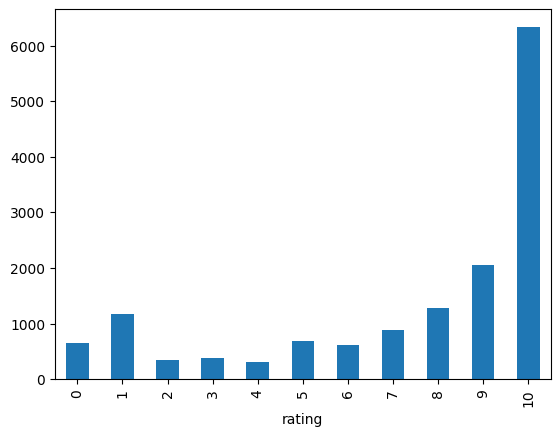

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

df.rating.value_counts().sort_index().plot(kind = 'bar')
plt.show() #불균형 데이터셋인 것을 확인할 수 있음 -> 정밀도와 재현율로 성능 판단

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.review, df.rating, random_state = 7)
print("#Train set size : ", len(X_train))
print("#Test set size : ", len(X_test))

from konlpy.tag import Okt
okt = Okt()

def twit_tokenizer(text):
    target_tags = ['Noun', 'Verb', 'Adjective'] #극성을 나타내는 명사, 동사, 형용사만 사용
    result = []
    for word, tag in okt.pos(text, norm = True, stem = True):
        if tag in target_tags:
            result.append(word)
    return result

tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, max_features = 2000, min_df = 5, max_df = 0.5)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#Train set size :  11043
#Test set size :  3682


C:\Users\ahyeo\anaconda3\envs\TextMining\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_tfidf, y_train)
print("#Regression Train set R2 score : {:.3f}".format(lr.score(X_train_tfidf, y_train)))
print("#Regression Test set R2 score : {:.3f}".format(lr.score(X_test_tfidf, y_test)))

#Regression Train set R2 score : 0.605
#Regression Test set R2 score : 0.395


In [25]:
#rating 분류가 아닌 극성 분류로 변환 및 성능 평가
y_train_senti = (y_train > 5)
y_test_senti = (y_test > 5)

y_train_predict = (lr.predict(X_train_tfidf) > 5)
y_test_predict = (lr.predict(X_test_tfidf) > 5)

from sklearn.metrics import precision_score, recall_score, f1_score

print(
    "#Accuracy for train set : {:.3f}".format(
        accuracy_score(y_train_senti, y_train_predict)
    )
)
print(
        "#Precision for train set : {:.3f}".format(
        precision_score(y_train_senti, y_train_predict)
    )
)
print(
        "#Recall for train set : {:.3f}".format(
       recall_score(y_train_senti, y_train_predict)
    )
)
print(
    "#F1score for train set : {:.3f}".format(
        f1_score(y_train_senti, y_train_predict)
    )
)

print(
    "#Accuracy for test set : {:.3f}".format(
        accuracy_score(y_test_senti, y_test_predict)
    )
)
print(
        "#Precision for test set : {:.3f}".format(
        precision_score(y_test_senti, y_test_predict)
    )
)
print(
        "#Recall for test set : {:.3f}".format(
       recall_score(y_test_senti, y_test_predict)
    )
)
print(
    "#F1score for test set : {:.3f}".format(
        f1_score(y_test_senti, y_test_predict)
    )
)


#Accuracy for train set : 0.888
#Precision for train set : 0.893
#Recall for train set : 0.969
#F1score for train set : 0.929
#Accuracy for test set : 0.848
#Precision for test set : 0.868
#Recall for test set : 0.946
#F1score for test set : 0.905


In [26]:
#logistic regression 사용
from sklearn.linear_model import LogisticRegression

#count vector에 대해 regression을 해 NB 비교
LR_clf = LogisticRegression()
LR_clf.fit(X_train_tfidf, y_train_senti)

y_train_predict = LR_clf.predict(X_train_tfidf)
y_test_predict = LR_clf.predict(X_test_tfidf)

print(
    "#Accuracy for train set : {:.3f}".format(
        accuracy_score(y_train_senti, y_train_predict)
    )
)
print(
        "#Precision for train set : {:.3f}".format(
        precision_score(y_train_senti, y_train_predict)
    )
)
print(
        "#Recall for train set : {:.3f}".format(
       recall_score(y_train_senti, y_train_predict)
    )
)
print(
    "#F1score for train set : {:.3f}".format(
        f1_score(y_train_senti, y_train_predict)
    )
)

print(
    "#Accuracy for test set : {:.3f}".format(
        accuracy_score(y_test_senti, y_test_predict)
    )
)
print(
        "#Precision for test set : {:.3f}".format(
        precision_score(y_test_senti, y_test_predict)
    )
)
print(
        "#Recall for test set : {:.3f}".format(
       recall_score(y_test_senti, y_test_predict)
    )
)
print(
    "#F1score for test set : {:.3f}".format(
        f1_score(y_test_senti, y_test_predict)
    )
)

#Accuracy for train set : 0.878
#Precision for train set : 0.878
#Recall for train set : 0.973
#F1score for train set : 0.923
#Accuracy for test set : 0.855
#Precision for test set : 0.866
#Recall for test set : 0.958
#F1score for test set : 0.910
